In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import KNeighborsClassifier
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_set = shuffle(pd.read_csv("C:\\Users\\Dell\\train.csv"))
test_set = shuffle(pd.read_csv("C:\\Users\\Dell\\test.csv"))
train_set['index'] = train_set.index
test_set['index'] = test_set.index

In [3]:
train_set

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,index
655,0.200785,-0.034158,-0.117562,-0.075627,-0.083393,-0.292318,-0.181834,-0.056119,-0.289756,0.463206,...,0.510240,-0.455781,0.990962,-0.434155,-0.748337,0.248675,0.107418,3,WALKING_DOWNSTAIRS,655
3801,0.273873,-0.011371,-0.091628,-0.995935,-0.980319,-0.981317,-0.996227,-0.980592,-0.980131,-0.939330,...,0.055253,0.342077,-0.507306,-0.768097,-0.807954,0.196674,-0.074743,19,STANDING,3801
6034,0.187739,-0.069863,-0.179417,-0.236785,-0.071121,-0.319841,-0.279304,-0.062308,-0.328753,-0.123612,...,0.177628,-0.859117,0.912720,0.094300,-0.794546,0.211965,0.105918,27,WALKING_UPSTAIRS,6034
6063,0.277378,-0.013298,-0.104322,-0.996596,-0.987491,-0.973345,-0.996372,-0.987746,-0.973512,-0.942156,...,0.122320,0.136275,-0.708377,-0.507788,-0.818263,0.222620,0.035430,27,STANDING,6063
5680,0.277990,-0.013832,-0.112411,-0.996978,-0.975376,-0.975158,-0.997313,-0.973793,-0.974701,-0.943824,...,0.065219,0.008468,0.325117,-0.672058,-0.867571,0.179782,-0.025594,26,STANDING,5680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,0.180382,0.017640,-0.081495,0.165175,-0.209078,-0.447798,0.081549,-0.243273,-0.417488,0.645905,...,0.512615,-0.600967,0.062064,0.772777,-0.992724,0.102803,0.020641,5,WALKING_DOWNSTAIRS,807
3799,0.278973,-0.014899,-0.108145,-0.996035,-0.991412,-0.995094,-0.996665,-0.990185,-0.994845,-0.937811,...,-0.055863,-0.172725,0.641048,0.527575,-0.806185,0.199439,-0.073359,19,STANDING,3799
5157,0.259172,-0.016699,-0.096576,-0.980846,-0.960978,-0.966363,-0.985384,-0.968509,-0.970776,-0.898042,...,-0.134209,-0.488057,-0.223383,0.592597,0.450883,-0.708588,-0.271070,25,LAYING,5157
3568,0.267163,-0.050673,-0.134559,0.187605,0.227187,-0.444794,0.121925,0.274300,-0.466614,0.479268,...,-0.067304,0.888569,0.875072,0.450485,-0.773746,0.246047,0.070075,17,WALKING_DOWNSTAIRS,3568


In [4]:
# list(train_set.columns)

In [5]:
print("Train set shape: ",train_set.shape)
print("Test set shape: ",test_set.shape)

Train set shape:  (7352, 564)
Test set shape:  (2947, 564)


In [6]:
print("train set:",train_set.isnull().values.any())
print("test set:",test_set.isnull().values.any())

train set: False
test set: False


In [7]:
train_set["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

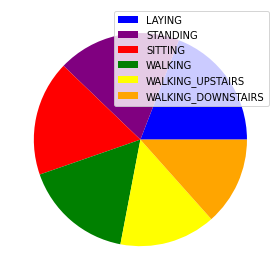

In [8]:
activities = train_set["Activity"].value_counts()
labels = activities.index
values = activities.values

colors = ['blue','purple', 'red', 'green','yellow', 'orange']
patches, texts = plt.pie(values, colors=colors)
plt.legend(patches, labels)
plt.tight_layout()
plt.show()

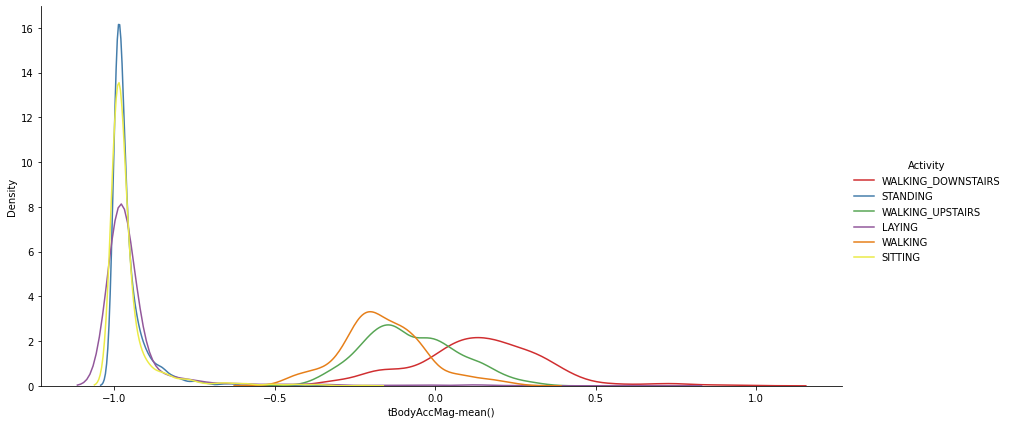

In [9]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_set, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()

In [10]:
y_train = train_set["Activity"]
X_train = train_set.drop(["Activity","subject"], axis=1)

y_test = test_set["Activity"]
X_test = test_set.drop(["Activity","subject"], axis=1)

In [11]:
scaler = StandardScaler()
for col in X_train.columns:
    X_train[col]  = scaler.fit_transform(X_train[[col]])
for col in X_test.columns:
    X_test[col]  = scaler.fit_transform(X_test[[col]])

In [12]:
inertia = []                #k-means
#consider 8 clusters
for nr in range(1 , 9):
    model = (KMeans(n_clusters = nr, random_state= 111  , algorithm='elkan') )
    model.fit(X_train)
    inertia.append(model.inertia_)

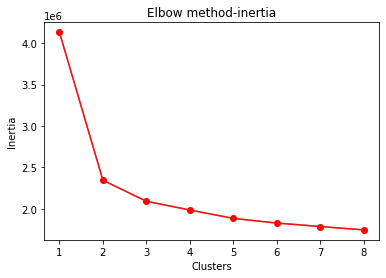

In [13]:
plt.plot(np.arange(1 ,9) , inertia , 'ro-')
plt.plot(np.arange(1 , 9) , inertia , alpha = 0.5)
plt.xlabel('Clusters') , plt.ylabel('Inertia')
plt.title("Elbow method-inertia")
plt.show()

In [14]:
km2 = KMeans(n_clusters=2,algorithm="elkan",random_state=111).fit(X_train)

Text(0.5, 1.0, 'Actual values')

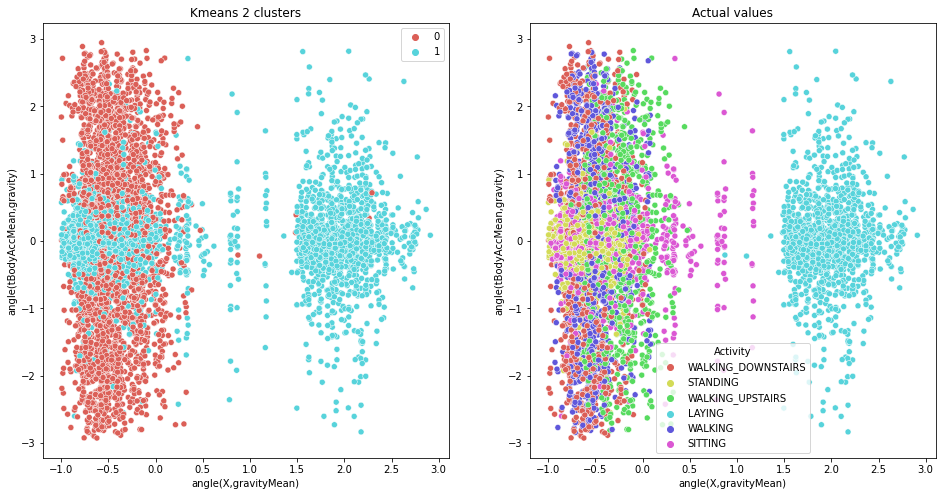

In [15]:
y_pred_2 = km2.labels_
f, axes = plt.subplots(1, 2)
f.set_figheight(8)
f.set_figwidth(16)
sns.scatterplot(X_train["angle(X,gravityMean)"], X_train["angle(tBodyAccMean,gravity)"], y_pred_2, 
                palette=sns.color_palette('hls', 2), ax=axes[0]).set_title("Kmeans 2 clusters")
sns.scatterplot(X_train["angle(X,gravityMean)"], X_train["angle(tBodyAccMean,gravity)"], y_train, 
                palette=sns.color_palette('hls', 6), ax=axes[1]).set_title("Actual values")

In [16]:
def two_labels(dataset):
    dataset_copied = dataset.copy()
    for label in range(len(dataset)):
        if dataset[label] == "SITTING":
            dataset[label] = 0
        elif dataset[label] == "LAYING":
            dataset[label] = 0
        elif dataset[label] == "STANDING":
            dataset[label] = 0
        elif dataset[label] == "WALKING_UPSTAIRS":
            dataset[label] = 1
        elif dataset[label] == "WALKING_DOWNSTAIRS":
            dataset[label] = 1
        elif dataset[label] == "WALKING":
            dataset[label] = 1
    return dataset_copied, dataset
y_train, y_train_2 = two_labels(y_train)
y_test, y_test_2 = two_labels(y_test)

In [17]:
conf_matrix = np.zeros((2,2))
for train_label, pred_label in zip(y_train_2.values, y_pred_2):
    conf_matrix[train_label][pred_label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix)

interpret = dict(zip(col_ind, row_ind))
predicted_labels = np.array([interpret[label]
                            for label in y_pred_2])
print(np.mean(predicted_labels == y_train_2))

0.9972796517954298


In [18]:
test_pred = np.array([interpret[label] for label in km2.predict(X_test)])
print(np.mean(test_pred == y_test_2))

0.998642687478792


In [19]:
km6 = KMeans(n_clusters=6, algorithm='elkan', random_state= 111, tol=0.01).fit(X_train)

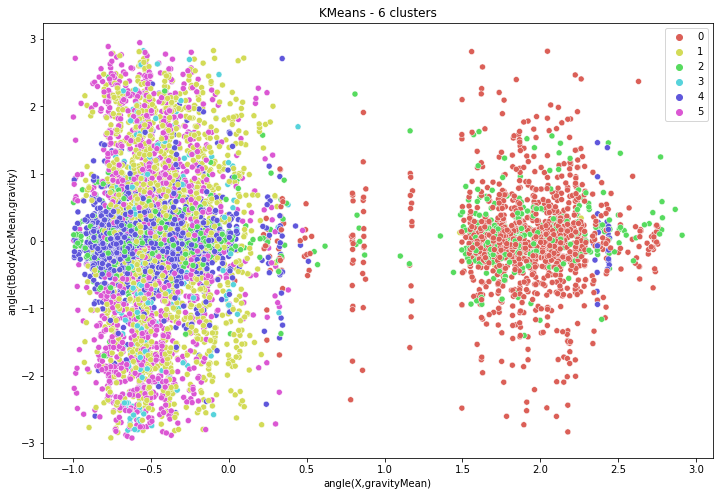

In [20]:
y_pred_6 = km6.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_train["angle(X,gravityMean)"], X_train["angle(tBodyAccMean,gravity)"],y_pred_6, 
                palette=sns.color_palette('hls',6))
plt.title('KMeans - 6 clusters')
plt.show()

In [21]:
def six_labels(dataset):
    dataset_copied = dataset.copy()
    for label in range(len(dataset)):
        if dataset[label] == "SITTING":
            dataset[label] = 0
        elif dataset[label] == "LAYING":
            dataset[label] = 1
        elif dataset[label] == "STANDING":
            dataset[label] = 2
        elif dataset[label] == "WALKING_UPSTAIRS":
            dataset[label] = 3
        elif dataset[label] == "WALKING_DOWNSTAIRS":
            dataset[label] = 4
        elif dataset[label] == "WALKING":
            dataset[label] = 5
    return dataset_copied,dataset
y_train, y_train_6 = six_labels(y_train)
y_test, y_test_6 = six_labels(y_test)

In [22]:
conf_matrix_6 = np.zeros((6,6))
for train_label, label in zip(y_train_6.values, y_pred_6):
    conf_matrix_6[train_label][label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix_6)

interpret = dict(zip(col_ind, row_ind))
predicted_labels = np.array([interpret[label]
                            for label in y_pred_6])
print(np.mean(predicted_labels == y_train_6))

0.530739934711643


In [23]:
test_pred_6 = np.array([interpret[label] for label in km6.predict(X_test)])
print(np.mean(test_pred_6 == y_test_6))

0.5700712589073634


In [24]:
from sklearn.model_selection import GridSearchCV

kmeans = KMeans()

parameters = {
    'init': ['k-means++', "random"],
    'algorithm': ["auto", "full", "elkan"],
    'tol': [0.0001, 0.001, 0.01]
    }

grid = GridSearchCV(kmeans, param_grid = parameters, scoring='completeness_score', cv=5)
grid.fit(X_train,y_train_6)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='completeness_score')

In [25]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'algorithm': 'full', 'init': 'random', 'tol': 0.001}
Accuracy : 0.5448847778300708


In [26]:
hierarchical_c_ward = linkage(X_train, method = "ward")              #hierarchical clustering
hierarchical_c_complete = linkage(X_train, "complete")
hierarchical_c_average = linkage(X_train, "average")
hierarchical_c_single = linkage(X_train, "single")

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 9, show_contracted = True)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_complete, truncate_mode = "lastp",p = 10, leaf_font_size = 9, show_contracted = True)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_average, truncate_mode = "lastp",p = 10, leaf_font_size = 9, show_contracted = True)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hierarchical_c_single, truncate_mode = "lastp",p = 10, leaf_font_size = 9, show_contracted = True);

In [ ]:
range_clusters = range(2,8)
for nr_clusters in range_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=nr_clusters)
    Agg_model.fit(X_train)
    agg_labels = Agg_model.labels_
    silhouette_sc = silhouette_score(X_train, agg_labels)
    print(f"The silhouette score is {silhouette_sc} for {nr_clusters} clusters.")

In [ ]:
Agg_model_2 = AgglomerativeClustering(n_clusters=2)
Agg_model_2.fit(X_train)
y_pred_agg_2 = Agg_model_2.labels_

In [ ]:
conf_matrix_agg_2 = np.zeros((2,2))
for train_label, label in zip(y_train_2.values, y_pred_agg_2):
    conf_matrix_agg_2[train_label][label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix_agg_2)

interpret = dict(zip(col_ind, row_ind))
train_pred_agg_2 = np.array([interpret[label]
                            for label in y_pred_agg_2])
print(np.mean(train_pred_agg_2 == y_train_2))

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
model_knn_2 = knn_2.fit(X_train,y_pred_agg_2)
y_test_predict_2 = model_knn_2.predict(X_test)

In [ ]:
test_pred_agg_2 = np.array([interpret[label] for label in y_test_predict_2])
print(np.mean(test_pred_agg_2 == y_test_2))

In [ ]:
Agg_model_6 = AgglomerativeClustering(n_clusters=6)
Agg_model_6.fit(X_train)
y_pred_agg_6 = Agg_model_6.labels_

In [ ]:
conf_matrix_agg_6 = np.zeros((6,6))
for train_label, label in zip(y_train_6.values, y_pred_agg_6):
    conf_matrix_agg_6[train_label][label] +=1
    
row_ind, col_ind = linear_sum_assignment(1/conf_matrix_agg_6)

interpret = dict(zip(col_ind, row_ind))
train_pred_agg_6 = np.array([interpret[label]
                            for label in y_pred_agg_6])
print(np.mean(train_pred_agg_6 == y_train_6))

In [ ]:
knn_6 = KNeighborsClassifier(n_neighbors=2)
model_knn_6 = knn_6.fit(X_train,y_pred_agg_6)
y_test_predict_6 = model_knn_6.predict(X_test)

In [ ]:
test_pred_agg_6 = np.array([interpret[label] for label in y_test_predict_6])
print(np.mean(test_pred_agg_6 == y_test_6))